# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [4]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [5]:
## TODO : load the csv file from this link : https://www.kaggle.com/code/vaibhagarwal/inferential-statistics/input
import requests, zipfile, io

# Download and Unzip File
url = 'https://github.com/devtlv/Datasets-GEN-AI-Bootcamp/raw/refs/heads/main/Week%205/Day%204%20-%20Statistics%20for%20Machine%20Learning/Inferential%20Statistics.zip'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("data")

In [6]:
## TODO : make into a dataframe called df
df = pd.read_csv(r'C:\Repositories\DI-Bootcamp\Week12\Day2\DailyChallenge\data\Churn_Modelling.csv')


In [7]:
## TODO : output the first 5 lines
print(df.shape)
print(df.head())

(10000, 14)
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4

In [8]:
## TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively
condition = df['Exited'] == 0
df_0 = df[condition]
df_1 = df[~condition]

# Check
print(df_0.shape)
print(df_1.shape)

(7963, 14)
(2037, 14)


## Hypothesis 1: Age

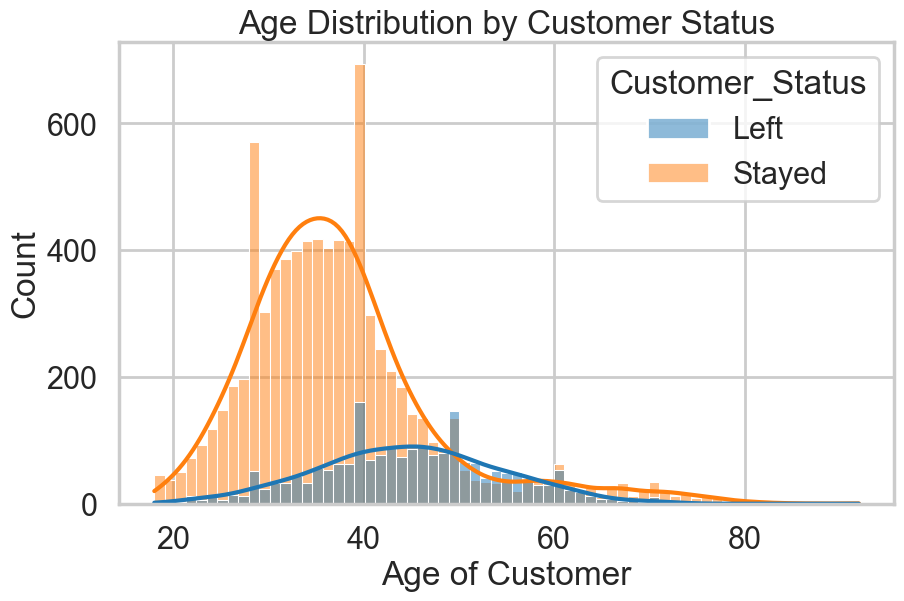

In [9]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn
## with different colors for each group and a legend.

# Create A New Column Mapped from Exit Status for Cleaner Lables
df['Customer_Status'] = df['Exited'].map({0 : 'Stayed', 1 : 'Left'})

# Create Plot
plt.figure(figsize=(10, 6))

# Use histplot with element='step' and stat='density' for a clear, overlapping view
sns.histplot(
    data=df,
    x='Age',
    hue='Customer_Status',
    kde=True,
)
plt.title('Age Distribution by Customer Status')
plt.xlabel('Age of Customer')
plt.ylabel('Count')
plt.show()

# Drop Label Column

In [10]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.
mean_stayed = df_0['Age'].mean()
std_stayed = df_0['Age'].std()

print("Stayed")
print(f"Mean: {mean_stayed:.4f}\nStd. Deviation: {std_stayed:.4f}")

Stayed
Mean: 37.4084
Std. Deviation: 10.1254


In [11]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.
mean_left = df_1['Age'].mean()
std_left = df_1['Age'].std()

print("Left")
print(f"Mean: {mean_left:.4f}\nStd. Deviation: {std_left:.4f}")

Left
Mean: 44.8380
Std. Deviation: 9.7616


In [12]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.
alpha = 0.05
t_stat, p_value = scipy.stats.ttest_ind(df_0['Age'], df_1['Age'])
print(f"P-Value: {p_value:.4f}\nT-Statistic: {t_stat:.4f}\n")

if p_value < alpha:
    print("REJECT the Null Hypothesis.\nThere is a statistically significant difference between the ages of those who left and those who stayed.")
else:
    print("ACCEPT the Null Hypothesis. There is NO statistically significant difference between the ages of those who left and those who stayed.")

P-Value: 0.0000
T-Statistic: -29.7668

REJECT the Null Hypothesis.
There is a statistically significant difference between the ages of those who left and those who stayed.


### Using Bootstrapping

In [20]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.
def bs_choice(data, func, size):
    """Perform bootstrap sampling and return bootstrap statistics."""
    bs_s = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, size=len(data), replace=True)
        bs_s[i] = func(bs_sample)
    return bs_s

In [21]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.
# Step 1: Compute the observed difference in means
obs_diff = df_0['Age'].mean() - df_1['Age'].mean()
print(f"Observed difference in means: {obs_diff:.3f}")

# Step 2: Shift both groups to have the same mean (the “null hypothesis” world)
combined_mean = pd.concat([df_0['Age'], df_1['Age']]).mean()
df_0_shifted = df_0['Age'] - df_0['Age'].mean() + combined_mean
df_1_shifted = df_1['Age'] - df_1['Age'].mean() + combined_mean

Observed difference in means: -7.430


In [23]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.
# Number of bootstrap replicates
n_reps = 1000 

# Bootstrap the mean for each shifted group
bs_means_0 = bs_choice(df_0_shifted, np.mean, n_reps)
bs_means_1 = bs_choice(df_1_shifted, np.mean, n_reps)

# Compute the difference in means for each bootstrap sample
bs_diff_null = bs_means_0 - bs_means_1

In [32]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.
p_value = np.sum(np.abs(bs_diff_null) >= np.abs(obs_diff)) / n_reps
print(f"Bootstrap p-value: {p_value}")

Bootstrap p-value: 0.0


### Conclusion
Do we reject the Null Hypothesis ? Why ?

We reject the null hypothesis as the P_Value is much lower than the alpha (0.05)

## Hypothesis 2: Credit Score

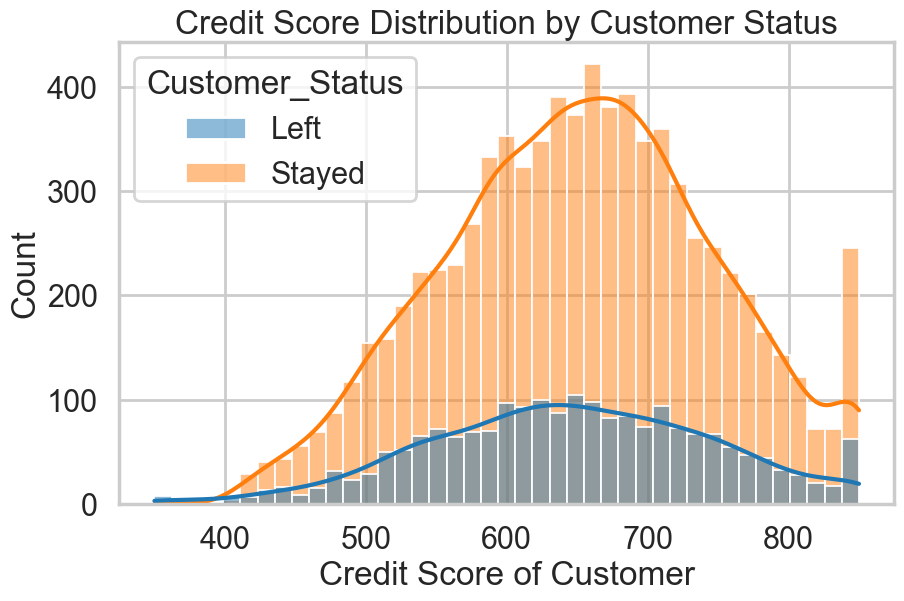

In [33]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).
# Create A New Column Mapped from Exit Status for Cleaner Lables
df['Customer_Status'] = df['Exited'].map({0 : 'Stayed', 1 : 'Left'})

# Create Plot
plt.figure(figsize=(10, 6))

# Use histplot with element='step' and stat='density' for a clear, overlapping view
sns.histplot(
    data=df,
    x='CreditScore',
    hue='Customer_Status',
    kde=True,
)
plt.title('Credit Score Distribution by Customer Status')
plt.xlabel('Credit Score of Customer')
plt.ylabel('Count')
plt.show()

In [34]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).
alpha = 0.05
t_stat, p_value = scipy.stats.ttest_ind(df_0['CreditScore'], df_1['CreditScore'])
print(f"P-Value: {p_value:.4f}\nT-Statistic: {t_stat:.4f}\n")

if p_value < alpha:
    print("REJECT the Null Hypothesis.\nThere is a statistically significant difference between the Credit Score of those who left and those who stayed.")
else:
    print("ACCEPT the Null Hypothesis. There is NO statistically significant difference between the Credit Score of those who left and those who stayed.")

P-Value: 0.0067
T-Statistic: 2.7101

REJECT the Null Hypothesis.
There is a statistically significant difference between the Credit Score of those who left and those who stayed.


### Conclusion
Do we reject the Null Hypothesis ? Why ?

- Reject the Null Hypothesis as the P_Value is lower than the Alpha (0.05)

## Hypothesis 3: Balance

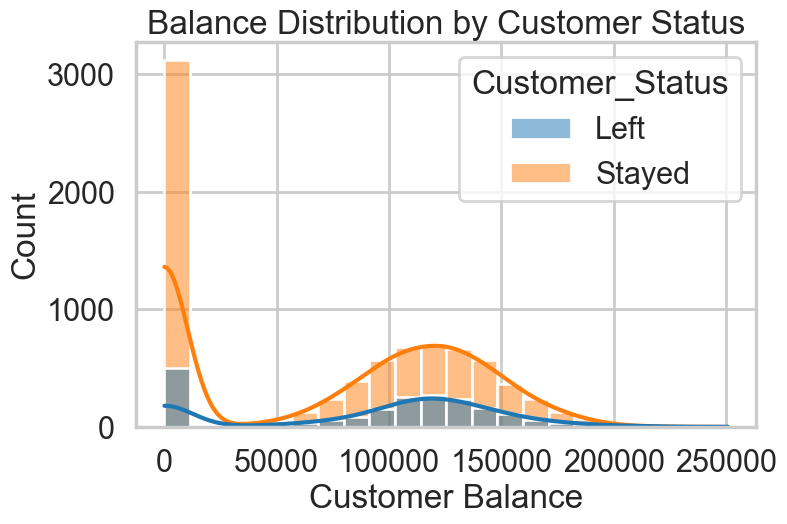

In [35]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).
df['Customer_Status'] = df['Exited'].map({0 : 'Stayed', 1 : 'Left'})
sns.histplot(data=df, x='Balance', hue='Customer_Status', kde=True)
plt.title('Balance Distribution by Customer Status')
plt.xlabel('Customer Balance')
plt.ylabel('Count')
plt.show()

In [38]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.
alpha = 0.05
t_stat, p_value = scipy.stats.ttest_ind(df_0['Balance'], df_1['Balance'])
print(f"P-Value: {p_value:.4f}\nT-Statistic: {t_stat:.4f}\n")

P-Value: 0.0000
T-Statistic: -11.9362



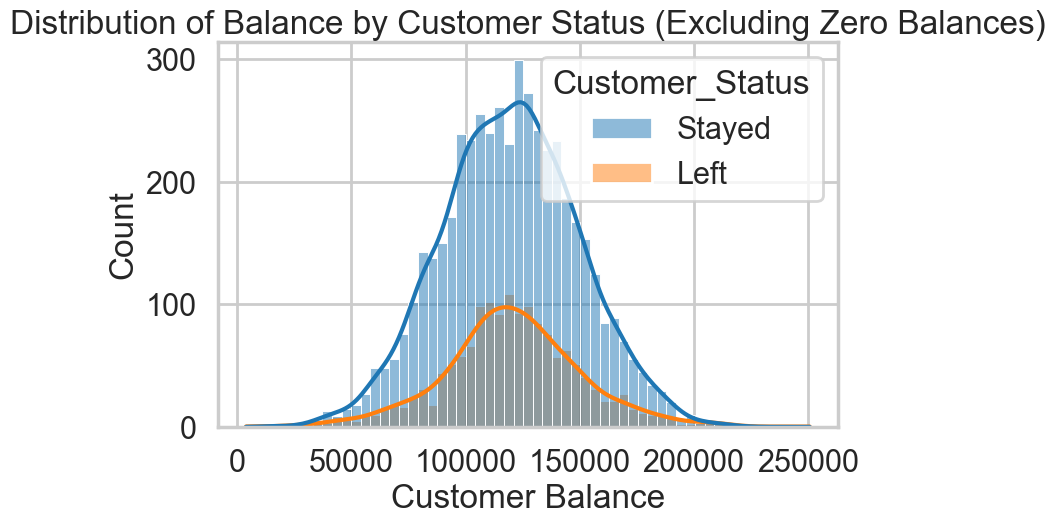

In [40]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.
# Create New Dataframe Excluding Zero Balances
condition = df['Balance'] == 0
df_non_zero = df[~condition]

# Visualize
sns.histplot(data=df_non_zero, x='Balance', hue='Customer_Status', kde=True)
plt.title('Distribution of Balance by Customer Status (Excluding Zero Balances)')
plt.xlabel('Customer Balance')
plt.ylabel('Count')
plt.show()

In [42]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.
# Separate into 2 Dataframes
condition = df_non_zero['Exited'] == 0
df_non_zero_0 = df_non_zero[condition]
df_non_zero_1 = df_non_zero[~condition]

# Check
print(df_non_zero.shape)
print(df_non_zero_0.shape)
print(df_non_zero_1.shape)

# T-Test
t_stat, p_value = scipy.stats.ttest_ind(df_non_zero_0['Balance'], df_non_zero_1['Balance'])
print(f"T-Statistic: {t_stat:.4f}\nP-Value: {p_value:.4f}")

(6383, 15)
(4846, 15)
(1537, 15)
T-Statistic: -1.3748
P-Value: 0.1692


## Conclusion

Do we reject the Null Hypothesis ? Why ?

- We do NOT reject the null hypothesis, as the P-Value is higher than our alpha (0.05`)

## Hypothesis 4: Estimated Salary

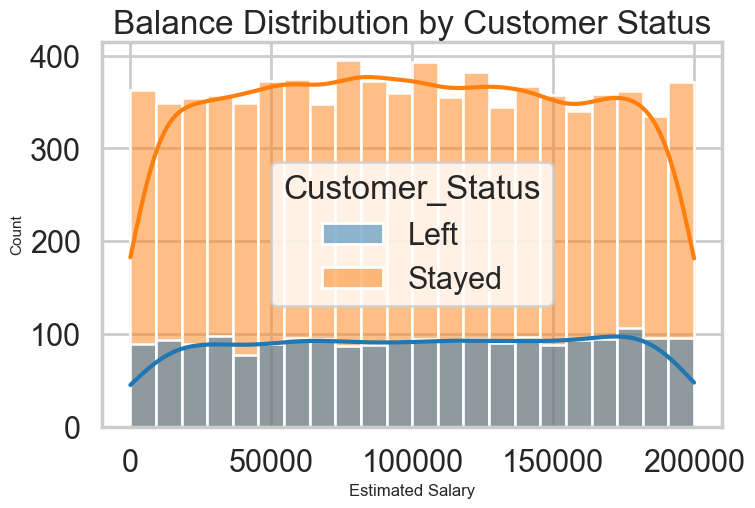

In [49]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.
sns.histplot(data=df, x='EstimatedSalary', hue='Customer_Status', kde=True)
plt.title('Balance Distribution by Customer Status')
plt.xlabel('Estimated Salary', size=12)
plt.ylabel('Count', size=11)
plt.show()

In [51]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.
t_stat, p_value = scipy.stats.ttest_ind(df_0['EstimatedSalary'], df_1['EstimatedSalary'])
print(f"T-Statistic: {t_stat:.4f}\nP-Value: {p_value:.4f}")

if p_value < alpha:
    print("REJECT the Null Hypothesis.\nThere is a statistically significant difference between the Estimated Salary of those who left and those who stayed.")
else:
    print("ACCEPT the Null Hypothesis. There is NO statistically significant difference between the Estimated Salary of those who left and those who stayed.")

T-Statistic: -1.2097
P-Value: 0.2264
ACCEPT the Null Hypothesis. There is NO statistically significant difference between the Estimated Salary of those who left and those who stayed.


### Using Bootstrapping

In [52]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.
# Step 1: Compute the observed difference in means
obs_diff = df_0['EstimatedSalary'].mean() - df_1['EstimatedSalary'].mean()
print(f"Observed difference in means: {obs_diff:.3f}")

# Step 2: Shift both groups to have the same mean (the “null hypothesis” world)
combined_mean = pd.concat([df_0['EstimatedSalary'], df_1['EstimatedSalary']]).mean()
df_0_shifted = df_0['EstimatedSalary'] - df_0['EstimatedSalary'].mean() + combined_mean
df_1_shifted = df_1['EstimatedSalary'] - df_1['EstimatedSalary'].mean() + combined_mean

Observed difference in means: -1727.286


In [53]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.
# Number of bootstrap replicates
n_reps = 1000 

# Bootstrap the mean for each shifted group
bs_means_0 = bs_choice(df_0_shifted, np.mean, n_reps)
bs_means_1 = bs_choice(df_1_shifted, np.mean, n_reps)

# Compute the difference in means for each bootstrap sample
bs_diff_null = bs_means_0 - bs_means_1

In [54]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.
p_value = np.sum(np.abs(bs_diff_null) >= np.abs(obs_diff)) / n_reps
print(f"Bootstrap p-value: {p_value}")

Bootstrap p-value: 0.244


### Conclusion
Do we reject the Null Hypothesis? Why?
- No, we do NOT reject the null hypothesis, as the P_Value is much higher than 0.05

## Final Conclusion
What will be the most helpful feature in predicting churning?

- The most helpful features will be Age and Credit Score
